In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import pylab
from matplotlib import cm

# Read in data

## Chondrite abundances

In [2]:
# Read the CSV file containing chondrite abundances
chondrite_abundances = pd.read_csv('Abunds_allnew_13jun2023.csv')

# Set the 'Element' column as the index of chondrite_abundances DataFrame
chondrite_abundances = chondrite_abundances.set_index('Element')

# Access the CI (Carbonaceous Chondrite) column from chondrite_abundances DataFrame
CI = chondrite_abundances.CI

## 2019 data

In [6]:
# Read the CSV files for data from 2019 (SQ, Ca, Si, and Mg)
data_2019_sq = pd.read_csv('2019_LA_CVdata_SQ_input_LOD.csv')
data_2019_ca = pd.read_csv('2019_LA_CVdata_Ca_input_LOD.csv')
data_2019_si = pd.read_csv('2019_LA_CVdata_Si_input_LOD.csv')
data_2019_mg = pd.read_csv('2019_LA_CVdata_Mg_input_LOD.csv')

In [7]:
# Create a list of DataFrame names
data_2019 = ['data_2019_sq', 'data_2019_ca', 'data_2019_si', 'data_2019_mg']

# Iterate over each DataFrame in the data_2019 list
for dataframe_name in data_2019:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [8]:
for dname in data_2019:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    locals()[dname] = locals()[dname].replace('BelowLOD', np.nan)
    
    #converting data columns to floats instead of strings
    column_index = locals()[dname].columns.get_loc('samples')
    cols = locals()[dname].iloc[:, column_index+1:].columns
    
    for col in cols:
        locals()[dname][col] = pd.to_numeric(locals()[dname][col], errors='coerce')

## 2022 data

In [9]:
# Read the CSV files for data from 2022 (SQ, Ca, Si, Mg, and Al)
data_2022_sq = pd.read_csv('2022_June_SQ_input2_LOD.csv')
data_2022_ca = pd.read_csv('2022_June_Ca_input2_LOD.csv')
data_2022_si = pd.read_csv('2022_June_Si_input2_LOD.csv')
data_2022_mg = pd.read_csv('2022_June_Mg_input2_LOD.csv')
data_2022_al = pd.read_csv('2022_June_Al_input2_LOD.csv')

In [10]:
# Create a list of DataFrame names
data_2022 = ['data_2022_sq', 'data_2022_ca', 'data_2022_si', 'data_2022_mg', 'data_2022_al']

# Iterate over each DataFrame in the data_2022 list
for dataframe_name in data_2022:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [11]:
for dname in data_2022:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    locals()[dname] = locals()[dname].replace('BelowLOD', np.nan)
    
    #converting data columns to floats instead of strings
    column_index = locals()[dname].columns.get_loc('index')
    cols = locals()[dname].iloc[:, column_index+1:].columns
    
    for col in cols:
        locals()[dname][col] = pd.to_numeric(locals()[dname][col], errors='coerce')

## Partition Coefficents

In [13]:
#data from Gokce 2019, averages between ex #9 and #12
# Gd, Tm, Lu from evans et al (2008). averages from cmas data
#now the data not included in Gokce's paper has been interpolated for
data = {
    'Element': ['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th'],
    'D_i': [0.002, 0.004, 0.004, 0.004, 0.003, 0.003, 0.006, 0.010, 0.013, 0.019, 0.031, 0.041, 0.054, 0.054, 0.045, 0.003, 0.003, 0.004, 0.002, 0.028, 0.003, 0.004, 0.002], 
    'error': [0.001, 0.001, np.nan, np.nan, np.nan, 0.001, np.nan, np.nan, 0.001, 0.001, np.nan, np.nan, 0.002, np.nan, 0.007, 0.001, 0.001, 0.001, 0.001, 0.007, 0.001, 0.001, 0.001]
    # Add more columns as needed
}
"""
data = {
    'Element': ['La', 'Ce', 'Eu',  'Gd', 'Dy', 'Ho', 'Tm', 'Yb', 'Lu', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th'],
    'D_i': [0.002, 0.004, 0.003, 0.001, 0.013, 0.019, 0.013, 0.054, 0.027, 0.045, 0.003, 0.003, 0.004, 0.002, 0.028, 0.003, 0.004, 0.002], 
    'error': [0.001, 0.001, 0.001, np.nan, 0.001, 0.001, np.nan, 0.002, np.nan, 0.007, 0.001, 0.001, 0.001, 0.001, 0.007, 0.001, 0.001, 0.001]
    # Add more columns as needed
}
"""
Di = pd.DataFrame(data)

In [14]:
ci = [CI.La, CI.Ce, CI.Pr, CI.Nd, CI.Sm, CI.Eu, CI.Gd, CI.Tb, CI.Dy, CI.Ho, CI.Er, CI.Tm, CI.Yb, CI.Lu, CI.Ti, CI.Zr, CI.Nb, CI.Hf, CI.Ta, CI.Ca, CI.Sr, CI.Ba, CI.Th] #lodders 2021

In [15]:
len(ci)

23

In [16]:
#elements = ['La', 'Ce', 'Eu', 'Gd', 'Dy', 'Ho', 'Tm', 'Yb', 'Lu', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th']
elements = ['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th']

In [17]:
"""
fig, ax = plt.subplots()

ax.scatter(Di.Element, Di.D_i)
ax.plot(Di.Element, Di.D_i)
ax.set_ylim([0,0.02])
ax.set_ylabel('$D_{i}$', fontsize=12);
"""

"\nfig, ax = plt.subplots()\n\nax.scatter(Di.Element, Di.D_i)\nax.plot(Di.Element, Di.D_i)\nax.set_ylim([0,0.02])\nax.set_ylabel('$D_{i}$', fontsize=12);\n"

## Onuma diagram

Got ionic radius data from Jia 1991. Used 6-fold radius as the REE are expected to go into octahedral sites in olivine structure. Radius is in angstroms.

In [18]:
# ree partiotion coefficents from gockes paper
subset_elements = ['La', 'Ce', 'Eu', 'Dy', 'Ho', 'Yb']
gok_ree = Di[Di['Element'].isin(subset_elements)][['Element', 'D_i']]
radius = [1.032, 1.01, 0.947, 0.912, 0.901, 0.868] #CN=6 
#radius = [1.160, 1.143, 1.25, 1.027, 1.015, 0.985] #CN=8
gok_ree['ionic_radius'] = radius
gok_ree = gok_ree.sort_values('ionic_radius').reset_index()

In [19]:
gok_ree

,index,Element,D_i,ionic_radius
0,12,Yb,0.054,0.868
1,9,Ho,0.019,0.901
2,8,Dy,0.013,0.912
3,5,Eu,0.003,0.947
4,1,Ce,0.004,1.010
5,0,La,0.002,1.032


In [21]:
new_ree =    ['Pr', 'Nd', 'Sm', 'Gd', 'Tb', 'Er', 'Tm', 'Lu']
new_ree_ir = [0.990, 0.983, 0.958, 0.938, 0.923, 0.890, 0.880, 0.861] #CN=6
new_ree_di = np.interp(new_ree_ir, gok_ree.ionic_radius, gok_ree.D_i)
new_ree_di

array([0.00368254, 0.00357143, 0.0031746 , 0.00557143, 0.00985714,
       0.03066667, 0.04127273, 0.054     ])

''

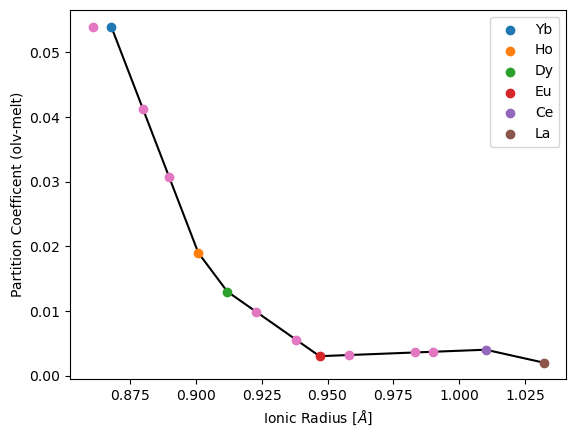

In [22]:
fig, ax = plt.subplots()
#ax.set_yscale("log")
ax.set_ylabel('Partition Coefficent (olv-melt)')
ax.set_xlabel('Ionic Radius [$\AA$]')

for i in range(0, len(gok_ree.ionic_radius)):
    
    ax.scatter(gok_ree.ionic_radius[i], gok_ree.D_i[i], label=gok_ree.Element[i])

ax.scatter(new_ree_ir, new_ree_di)
ax.plot(gok_ree.ionic_radius, gok_ree.D_i, color ='black', zorder=0)
ax.legend()
;

## cleaning up data

In [23]:
columns2019 = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 
               'La139_ppm_mean', 'Ce140_ppm_mean', 'Pr141_ppm_mean','Nd146_ppm_mean', 
               'Sm147_ppm_mean', 'Eu153_ppm_mean', 'Gd160_ppm_mean', 'Tb159_ppm_mean',
               'Dy163_ppm_mean','Ho165_ppm_mean', 'Er166_ppm_mean', 'Tm169_ppm_mean', 
               'Yb172_ppm_mean', 'Lu175_ppm_mean', 'Ti48_ppm_mean', 'Zr90_ppm_mean',
               'Nb93_ppm_mean', 'Hf178_ppm_mean', 'Ta181_ppm_mean', 'Ca44_ppm_mean',
               'Sr88_ppm_mean', 'Ba137_ppm_mean', 'Th232_ppm_mean']

columns2022 = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 
               'La139_ppm_mean', 'Ce140_ppm_mean', 'Pr141_ppm_mean','Nd146_ppm_mean', 
               'Sm147_ppm_mean', 'Eu153_ppm_mean', 'Gd157_ppm_mean', 'Tb159_ppm_mean',
               'Dy163_ppm_mean','Ho165_ppm_mean', 'Er166_ppm_mean', 'Tm169_ppm_mean', 
               'Yb172_ppm_mean', 'Lu175_ppm_mean', 'Ti48_ppm_mean', 'Zr90_ppm_mean',
               'Nb93_ppm_mean', 'Hf178_ppm_mean', 'Ta181_ppm_mean', 'Ca44_ppm_mean',
               'Sr88_ppm_mean', 'Ba137_ppm_mean', 'Th232_ppm_mean']


columns2019_err = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 
                   'La139_ppm_2SE(int)', 'Ce140_ppm_2SE(int)', 'Pr141_ppm_2SE(int)', 'Nd146_ppm_2SE(int)',
                   'Sm147_ppm_2SE(int)', 'Eu153_ppm_2SE(int)', 'Gd160_ppm_2SE(int)', 'Tb159_ppm_2SE(int)',
                   'Dy163_ppm_2SE(int)', 'Ho165_ppm_2SE(int)', 'Er166_ppm_2SE(int)', 'Tm169_ppm_2SE(int)', 
                   'Yb172_ppm_2SE(int)', 'Lu175_ppm_2SE(int)', 'Ti48_ppm_2SE(int)', 'Zr90_ppm_2SE(int)',
                   'Nb93_ppm_2SE(int)', 'Hf178_ppm_2SE(int)', 'Ta181_ppm_2SE(int)', 'Ca44_ppm_2SE(int)',
                   'Sr88_ppm_2SE(int)', 'Ba137_ppm_2SE(int)', 'Th232_ppm_2SE(int)']

columns2022_err = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 
                   'La139_ppm_2SE(int)', 'Ce140_ppm_2SE(int)', 'Pr141_ppm_2SE(int)', 'Nd146_ppm_2SE(int)',
                   'Sm147_ppm_2SE(int)', 'Eu153_ppm_2SE(int)', 'Gd157_ppm_2SE(int)', 'Tb159_ppm_2SE(int)',
                   'Dy163_ppm_2SE(int)', 'Ho165_ppm_2SE(int)', 'Er166_ppm_2SE(int)', 'Tm169_ppm_2SE(int)', 
                   'Yb172_ppm_2SE(int)', 'Lu175_ppm_2SE(int)', 'Ti48_ppm_2SE(int)', 'Zr90_ppm_2SE(int)',
                   'Nb93_ppm_2SE(int)', 'Hf178_ppm_2SE(int)', 'Ta181_ppm_2SE(int)', 'Ca44_ppm_2SE(int)',
                   'Sr88_ppm_2SE(int)', 'Ba137_ppm_2SE(int)', 'Th232_ppm_2SE(int)']

columns2019_olv = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 'Spot_Num',
               'La139_ppm_mean', 'Ce140_ppm_mean', 'Pr141_ppm_mean','Nd146_ppm_mean', 
               'Sm147_ppm_mean', 'Eu153_ppm_mean', 'Gd160_ppm_mean', 'Tb159_ppm_mean',
               'Dy163_ppm_mean','Ho165_ppm_mean', 'Er166_ppm_mean', 'Tm169_ppm_mean', 
               'Yb172_ppm_mean', 'Lu175_ppm_mean', 'Ti48_ppm_mean', 'Zr90_ppm_mean',
               'Nb93_ppm_mean', 'Hf178_ppm_mean', 'Ta181_ppm_mean', 'Ca44_ppm_mean',
               'Sr88_ppm_mean', 'Ba137_ppm_mean', 'Th232_ppm_mean']

columns2022_olv = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 'Spot_Num',
               'La139_ppm_mean', 'Ce140_ppm_mean', 'Pr141_ppm_mean','Nd146_ppm_mean', 
               'Sm147_ppm_mean', 'Eu153_ppm_mean', 'Gd157_ppm_mean', 'Tb159_ppm_mean',
               'Dy163_ppm_mean','Ho165_ppm_mean', 'Er166_ppm_mean', 'Tm169_ppm_mean', 
               'Yb172_ppm_mean', 'Lu175_ppm_mean', 'Ti48_ppm_mean', 'Zr90_ppm_mean',
               'Nb93_ppm_mean', 'Hf178_ppm_mean', 'Ta181_ppm_mean', 'Ca44_ppm_mean',
               'Sr88_ppm_mean', 'Ba137_ppm_mean', 'Th232_ppm_mean']

In [24]:
column_rename_dict = {old_col: new_col for old_col, new_col in zip(columns2019, columns2022)}
columnerr_rename_dict = {old_col: new_col for old_col, new_col in zip(columns2019_err, columns2022_err)}

In [25]:
olv2019 = data_2019_mg[(data_2019_mg.Phase=='olv') & (data_2019_mg.Component=='chondrule')][columns2019_olv]
olv2019.rename(columns=column_rename_dict, inplace=True)
olv2022 = data_2022_mg[(data_2022_mg.Phase=='olv') & (data_2022_mg.Component=='chondrule')][columns2022_olv]
olv = pd.concat([olv2019, olv2022])

In [56]:
olv2019err = data_2019_mg[(data_2019_mg.Phase=='olv') & (data_2019_mg.Component=='chondrule')][columns2019_err]
olv2019err.rename(columns=column_rename_dict, inplace=True)
olv2022err = data_2022_mg[(data_2022_mg.Phase=='olv') & (data_2022_mg.Component=='chondrule')][columns2022_err]
olverr = pd.concat([olv2019err, olv2022err])

In [26]:
gls2019 = data_2019_ca[(data_2019_ca.Phase=='gls') & (data_2019_ca.Component=='chondrule')][columns2019]
gls2019.rename(columns =column_rename_dict, inplace=True)
gls2022 = data_2022_ca[(data_2022_ca.Phase=='gls') & (data_2022_ca.Component=='chondrule')][columns2022]
gls = pd.concat([gls2019, gls2022])

In [27]:
gls2019err = data_2019_ca[(data_2019_ca.Phase=='gls') & (data_2019_ca.Component=='chondrule')][columns2019_err]
gls2019err.rename(columns =columnerr_rename_dict, inplace=True)
gls2022err = data_2022_ca[(data_2022_ca.Phase=='gls') & (data_2022_ca.Component=='chondrule')][columns2022_err]
glserr = pd.concat([gls2019err, gls2022err])

# calculating averages and expected olivine values

In [28]:
gls_avg = gls.groupby(['Met_Name', 'Object']).mean()
gls_avg_ci = gls_avg.div(ci, axis=1)

/tmp/ipykernel_340/3525219804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gls_avg = gls.groupby(['Met_Name', 'Object']).mean()


In [45]:
olv_avg_meas = olv.groupby(['Met_Name', 'Object']).mean()#min(numeric_only=True) #right now its set to pick the min for each element
#olv_avg_meas_ci = olv_avg_meas.div(ci, axis=1)
#olv_meas_ci = olv.div(ci, axis=1)

/tmp/ipykernel_340/147427181.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  olv_avg_meas = olv.groupby(['Met_Name', 'Object']).mean()#min(numeric_only=True) #right now its set to pick the min for each element


In [29]:
olv_avg_calc_ci = gls_avg_ci.mul(np.array(Di.D_i), axis=1)

In [30]:
glserr_acu = glserr.groupby(['Met_Name', 'Object']).agg(lambda x: 0.5 * np.sqrt(sum(x**2)))

/tmp/ipykernel_340/2964452096.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  glserr_acu = glserr.groupby(['Met_Name', 'Object']).agg(lambda x: 0.5 * np.sqrt(sum(x**2)))


In [31]:
xerr = (glserr_acu.div(gls_avg.values))**2

In [32]:
yerr = (Di.error/Di.D_i)**2

In [33]:
zerr_z = np.sqrt(xerr.add(yerr.values, axis=1))

In [34]:
zerr = zerr_z.mul(olv_avg_calc_ci.values)

In [35]:
chondrules = gls_avg.index

In [108]:
col_grab = ['La139_ppm_mean', 'Ce140_ppm_mean', 'Pr141_ppm_mean','Nd146_ppm_mean', 
               'Sm147_ppm_mean', 'Eu153_ppm_mean', 'Gd157_ppm_mean', 'Tb159_ppm_mean',
               'Dy163_ppm_mean','Ho165_ppm_mean', 'Er166_ppm_mean', 'Tm169_ppm_mean', 
               'Yb172_ppm_mean', 'Lu175_ppm_mean', 'Ti48_ppm_mean', 'Zr90_ppm_mean',
               'Nb93_ppm_mean', 'Hf178_ppm_mean', 'Ta181_ppm_mean', 'Ca44_ppm_mean',
               'Sr88_ppm_mean', 'Ba137_ppm_mean', 'Th232_ppm_mean']
col_graberr = ['La139_ppm_2SE(int)', 'Ce140_ppm_2SE(int)', 'Pr141_ppm_2SE(int)', 'Nd146_ppm_2SE(int)',
                   'Sm147_ppm_2SE(int)', 'Eu153_ppm_2SE(int)', 'Gd157_ppm_2SE(int)', 'Tb159_ppm_2SE(int)',
                   'Dy163_ppm_2SE(int)', 'Ho165_ppm_2SE(int)', 'Er166_ppm_2SE(int)', 'Tm169_ppm_2SE(int)', 
                   'Yb172_ppm_2SE(int)', 'Lu175_ppm_2SE(int)', 'Ti48_ppm_2SE(int)', 'Zr90_ppm_2SE(int)',
                   'Nb93_ppm_2SE(int)', 'Hf178_ppm_2SE(int)', 'Ta181_ppm_2SE(int)', 'Ca44_ppm_2SE(int)',
                   'Sr88_ppm_2SE(int)', 'Ba137_ppm_2SE(int)', 'Th232_ppm_2SE(int)']

## picking min olv spot

In [37]:
#manually picking spots
data = {
    'meteorite': ['Alps1', 'Alps1', 'Alps1', 'Alps1', 'Alps1',
                 'Alps1', 'Alps6', 'Alps6', 'Alps6', 'Alps6',
                 'Alps6', 'Alps6', 'Alps6', 'Alps6', 'Alps6',
                 'Alps6', 'Alps6', 'Alps9', 'Alps9', 'Alps9',
                 'Alps9', 'Alps9', 'Alps9', 'Alps9', 'Alps9',
                 'Alps9', 'Alps9', 'Alps9', 'Alps9', 'Alps9',
                 'Alps9', 'Leops2B', 'Leops2B', 'Leops2B', 'Leops2B',
                 'Leops2B', 'Leops2B', 'Vigps1B', 'Vigps1B', 'Vigps1B',
                 'Vigps1B', 'Vigps2B', 'Vigps2B'],
    'object': ['c1', 'c2', 'c3', 'c4', 'c7',
              'c9', 'c13', 'c21', 'c24', 'c32',
              'c40', 'c41', 'c44', 'c47', 'c5',
              'c7', 'c8', 'c1', 'c11', 'c12',
              'c13', 'c14', 'c15', 'c16', 'c20',
              'c21', 'c22', 'c26', 'c4', 'c8',
              'c9', 'c10', 'c2', 'c4a', 'c7',
              'c8', 'c9', 'c10', 'c12', 'c14',
              'c15', 'c10', 'c12'], 
    'spot': [7, 7, 5, 10, 10,
            11, 5, 2, 3, 5,
            1, 7, 2, 1, 1,
            1, 1, 6, 2, 1,
            2, 1, 5, 4, 1,
            4, 1, 2, 1, 3,
            1, 8, 10, 3, 16,
            2, 9, 9, 7, 5,
            6, 7, 13]
    # Add more columns as needed
}
olv_spots = pd.DataFrame(data).set_index(['meteorite', 'object'])

#### trying to automate

In [17]:
col_ele = columns2022 = ['La139_ppm_mean', 'Ce140_ppm_mean', 'Eu153_ppm_mean', 'Gd157_ppm_mean',
               'Dy163_ppm_mean','Ho165_ppm_mean', 'Tm169_ppm_mean', 'Yb172_ppm_mean', 
               'Lu175_ppm_mean']

In [18]:
olv['ree_avg'] = olv.apply(lambda row: np.nanmean(row[col_ele]), axis=1)

In [19]:
olv_reeavg = olv[['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 'ree_avg']]

In [27]:
olv_reeavg[(olv_reeavg.Met_Name=='Alps1') & (olv_reeavg.Object=='c2')]

,LA_Name,Met_Name,Object,Phase,Component,ree_avg
7,Alps1-c2_5,Alps1,c2,olv,chondrule,8.926133e-05
8,Alps1-c2_7,Alps1,c2,olv,chondrule,1.906120e-02
28,Alps1-c2_12,Alps1,c2,olv,chondrule,7.363860e-04
101,Alps1-c2_6,Alps1,c2,olv,chondrule,4.110000e-08
127,Alps1-c2_11,Alps1,c2,olv,chondrule,8.307657e-03


In [32]:
test = olv_reeavg.set_index('ree_avg')

In [33]:
test

,LA_Name,Met_Name,Object,Phase,Component
ree_avg,,,,,
0.298931,Alps9-c8_8,Alps9,c8,olv,chondrule
0.000089,Alps1-c2_5,Alps1,c2,olv,chondrule
0.019061,Alps1-c2_7,Alps1,c2,olv,chondrule
0.054759,Alps1-c4_5,Alps1,c4,olv,chondrule
0.020888,Alps1-c4_8,Alps1,c4,olv,chondrule
...,...,...,...,...,...
0.027167,Alps6_c40_1,Alps6,c40,olv,chondrule
0.064765,Alps9_c4b_1,Alps9,c4,olv,chondrule
0.027357,Alps9_c17_1,Alps9,c17,olv,chondrule


In [37]:
min_rees = olv_reeavg.groupby(['Met_Name', 'Object']).min(numeric_only=True).ree_avg.values

In [38]:
test.loc[min_rees]

,LA_Name,Met_Name,Object,Phase,Component
ree_avg,,,,,
1.772032e-01,Alps1-c1_7,Alps1,c1,olv,chondrule
4.110000e-08,Alps1-c2_6,Alps1,c2,olv,chondrule
1.649062e-02,Alps1-c3_9,Alps1,c3,olv,chondrule
2.088800e-02,Alps1-c4_8,Alps1,c4,olv,chondrule
1.748732e-02,Alps1-c7_11,Alps1,c7,olv,chondrule
3.151404e-02,Alps1-c9_7,Alps1,c9,olv,chondrule
1.051206e-02,Alps6_c13_7,Alps6,c13,olv,chondrule
1.704097e-02,Alps6_c21_2,Alps6,c21,olv,chondrule
1.729410e-02,Alps6_c24_5,Alps6,c24,olv,chondrule


## plotting

/tmp/ipykernel_340/3043361417.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,4))


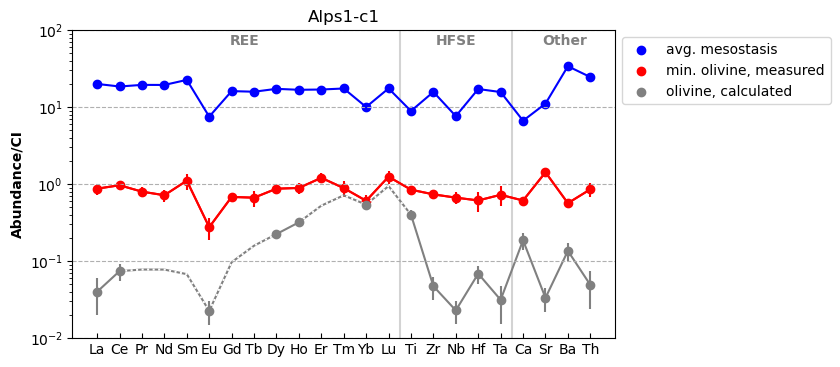

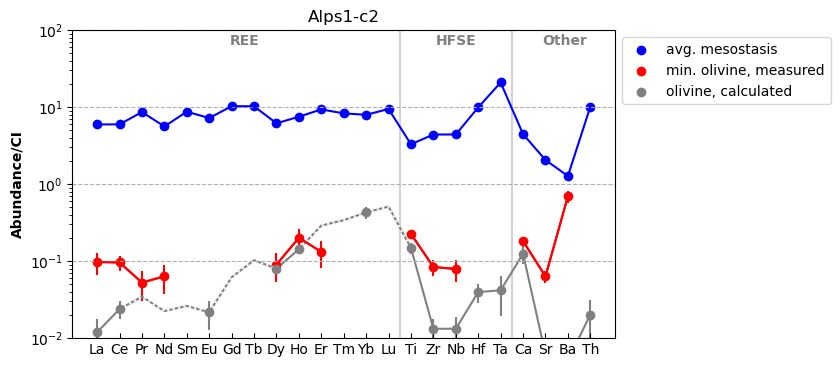

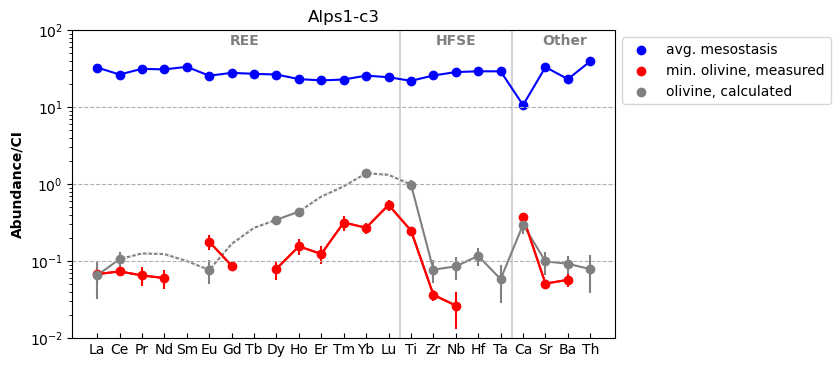

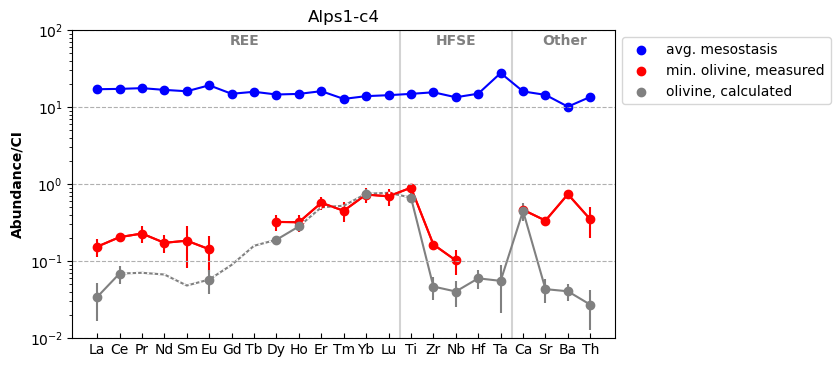

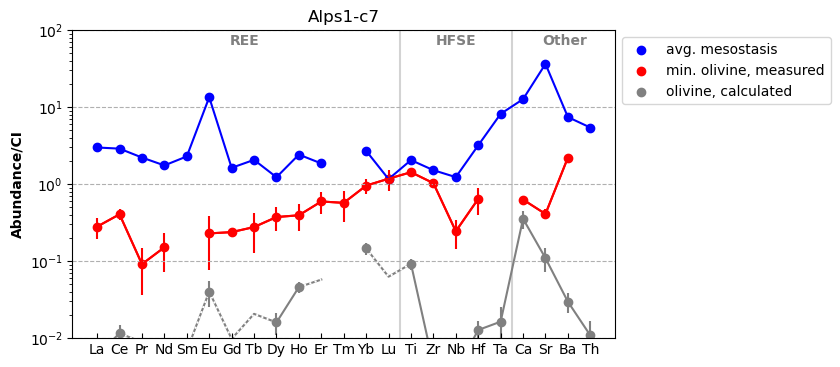

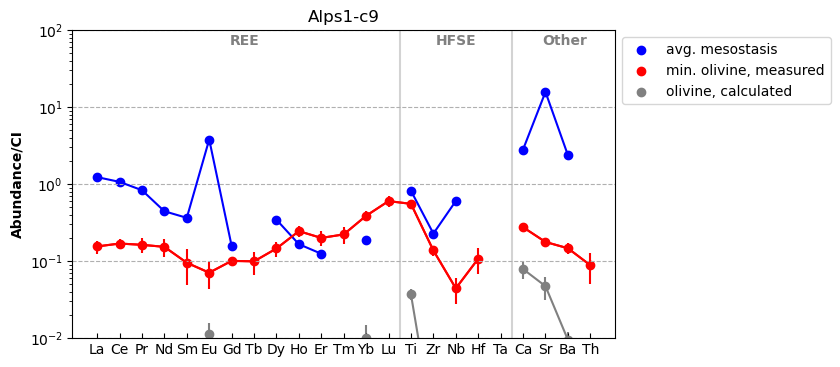

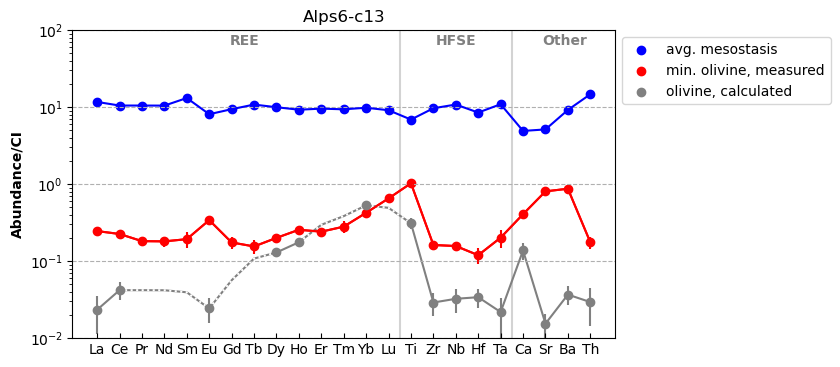

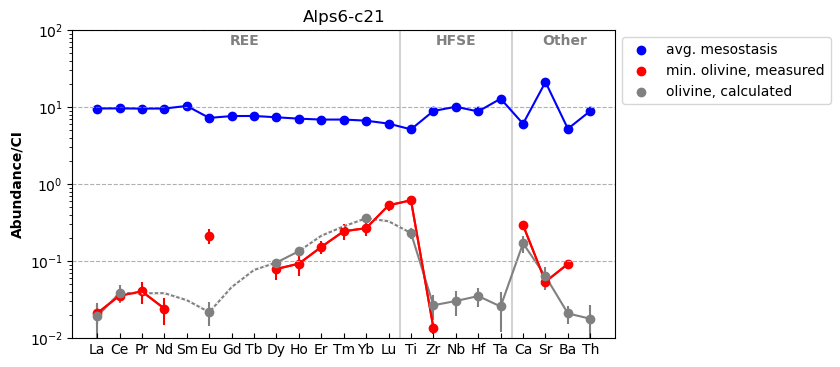

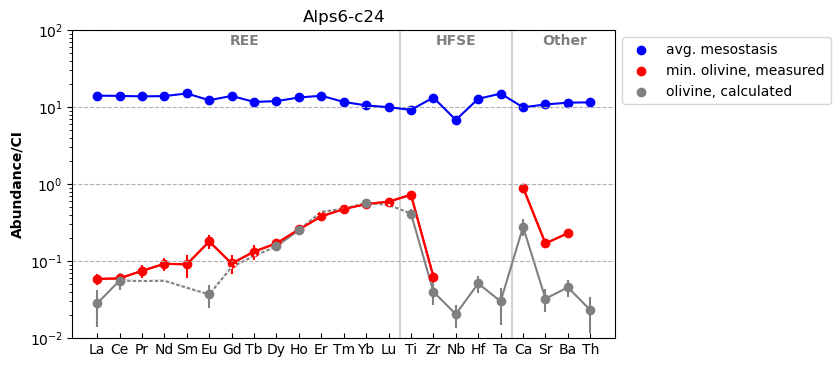

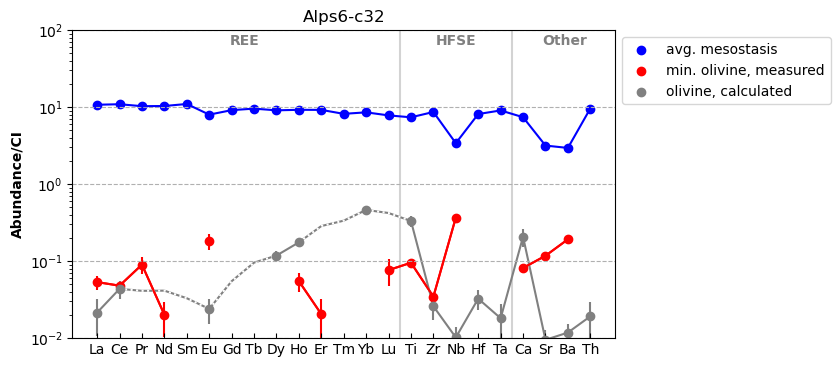

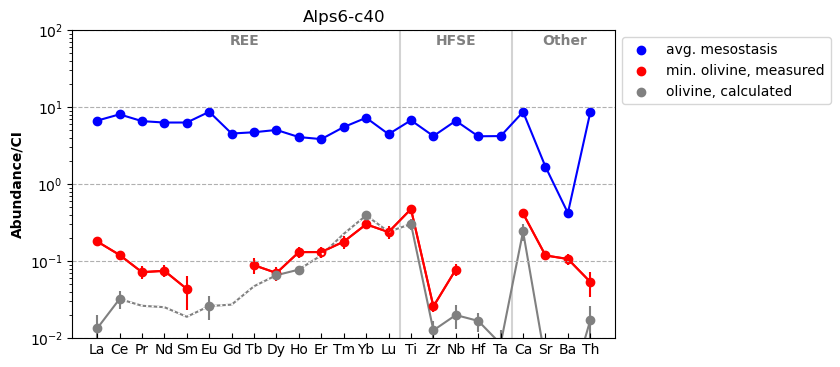

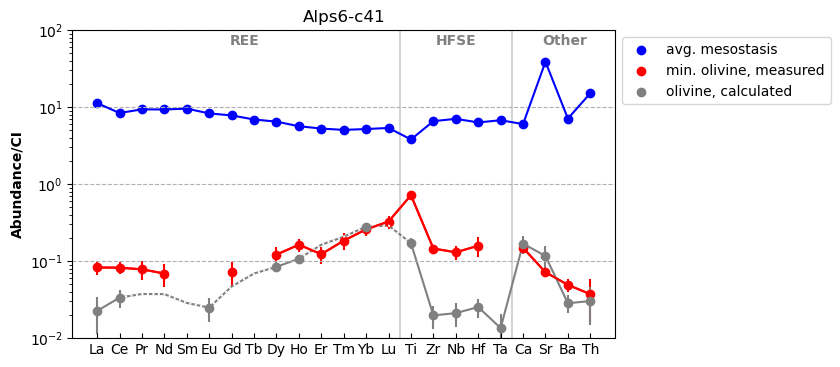

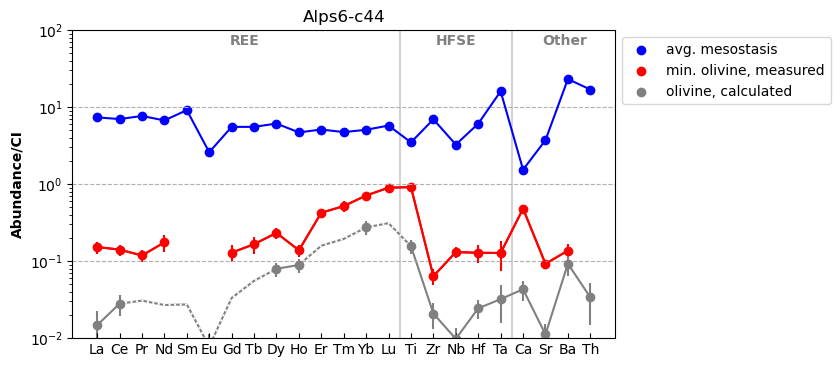

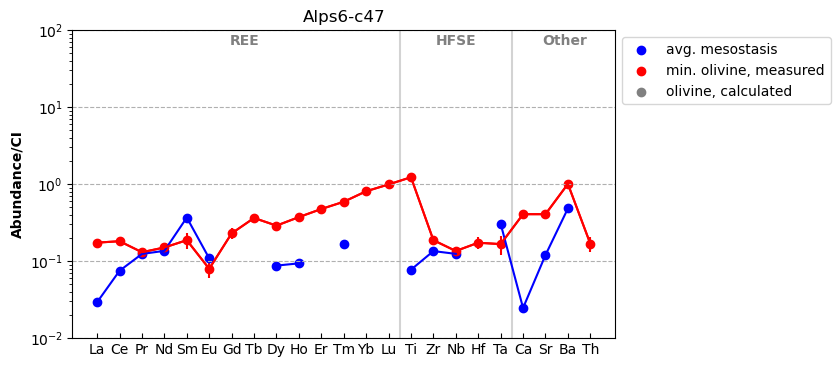

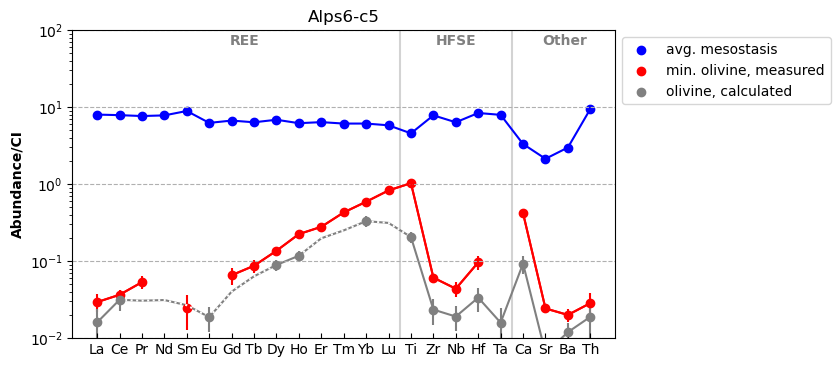

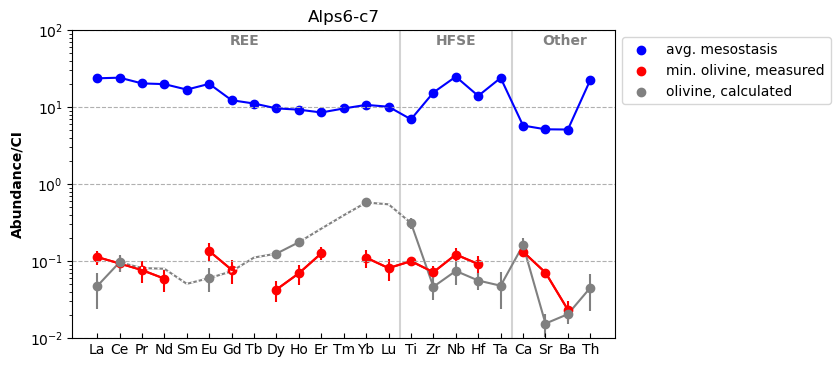

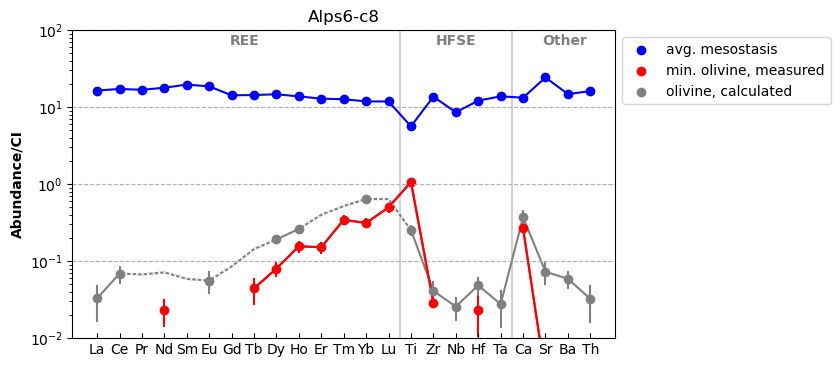

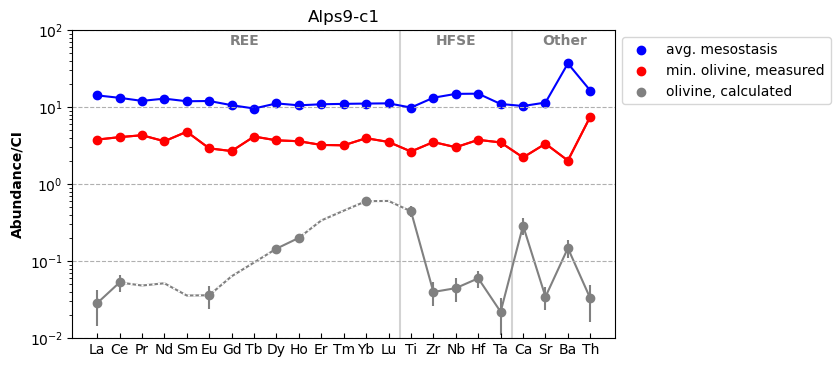

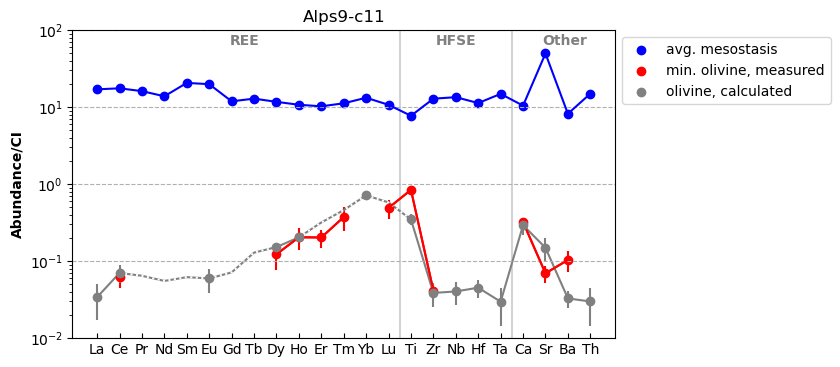

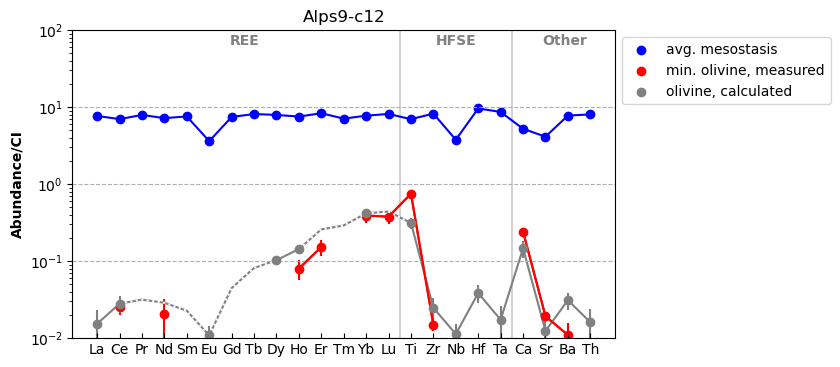

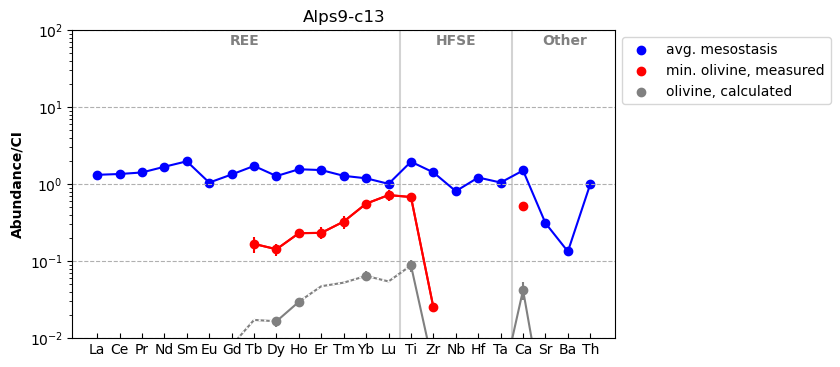

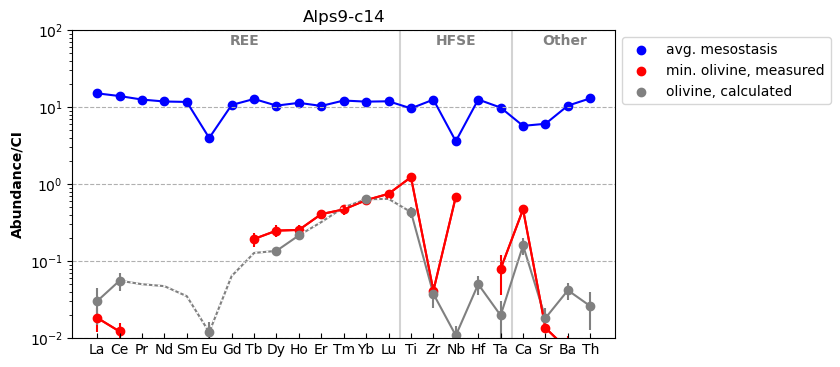

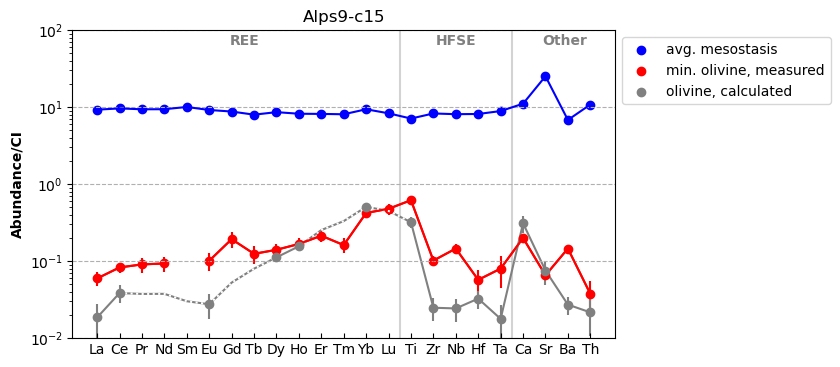

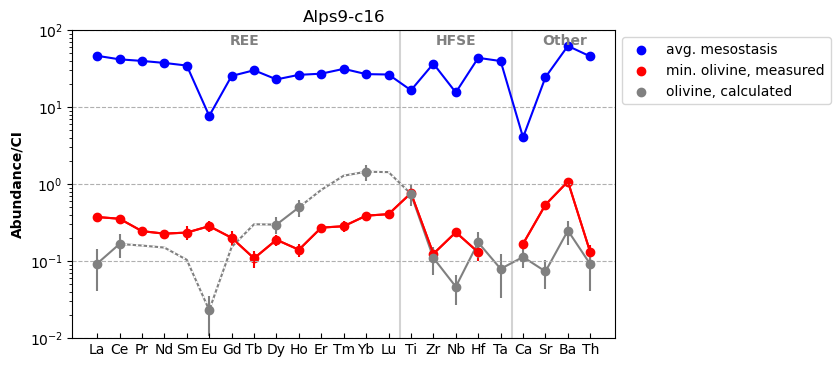

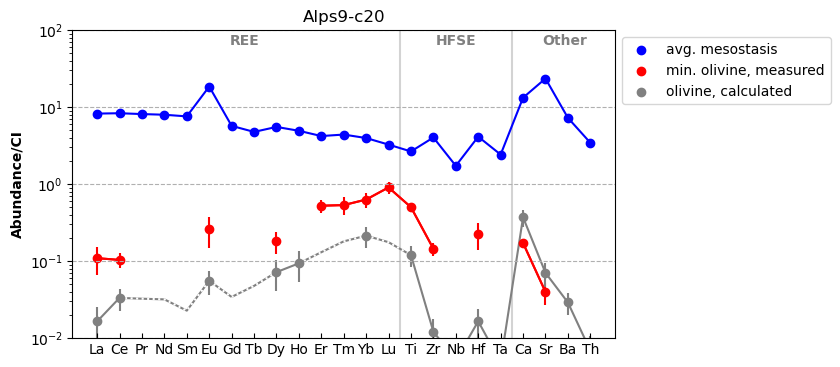

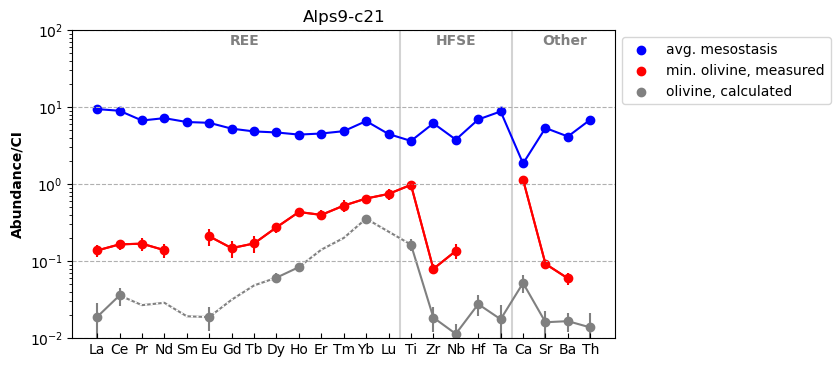

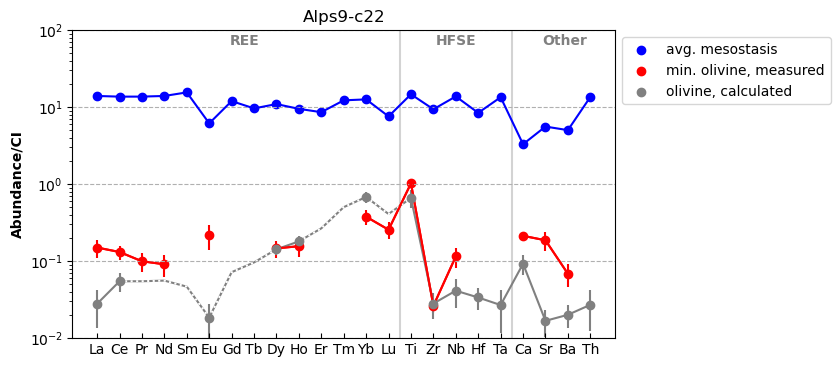

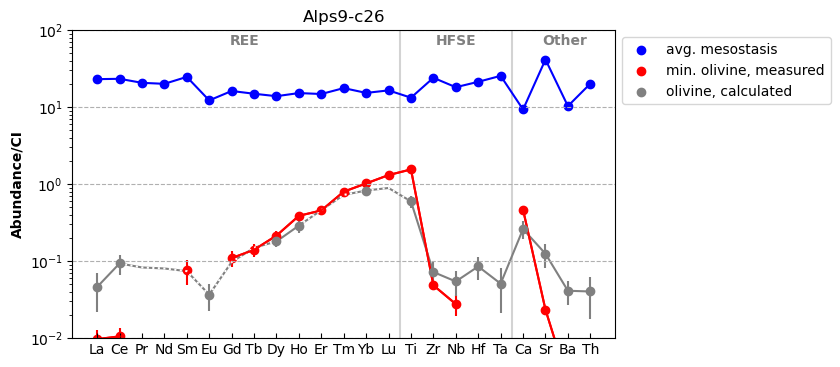

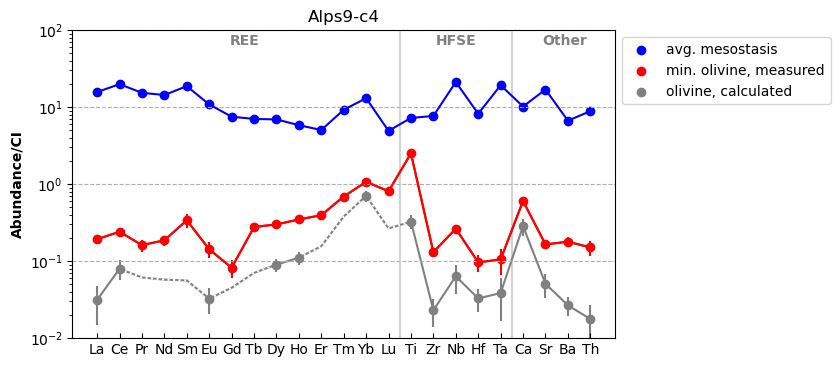

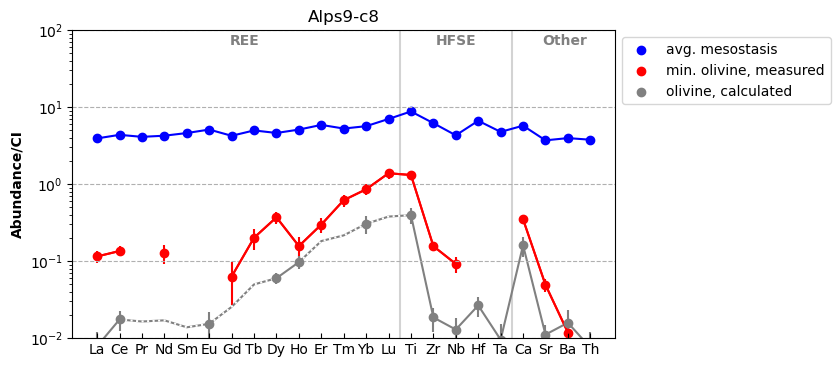

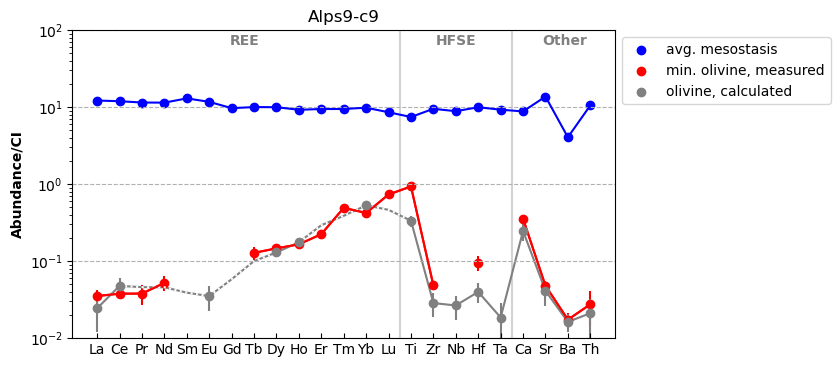

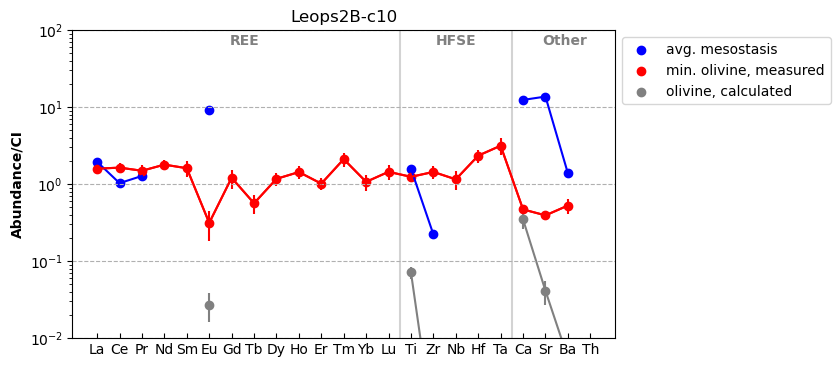

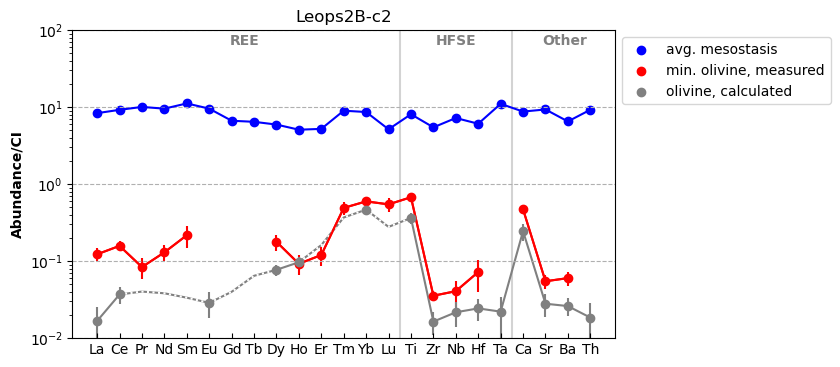

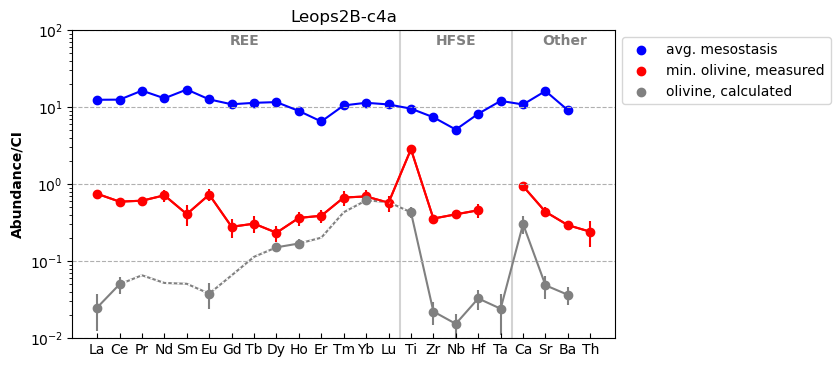

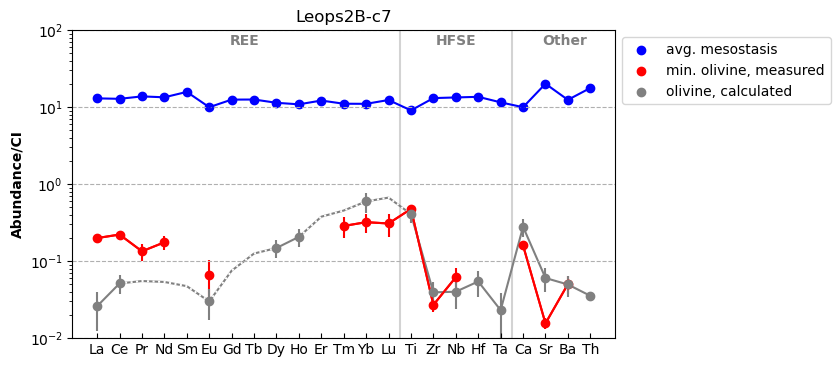

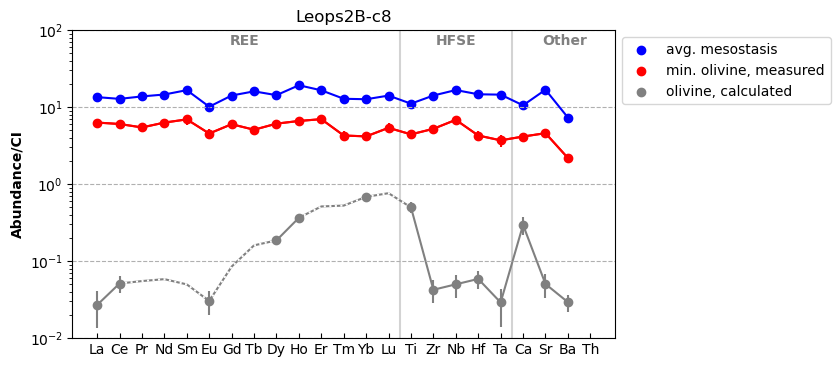

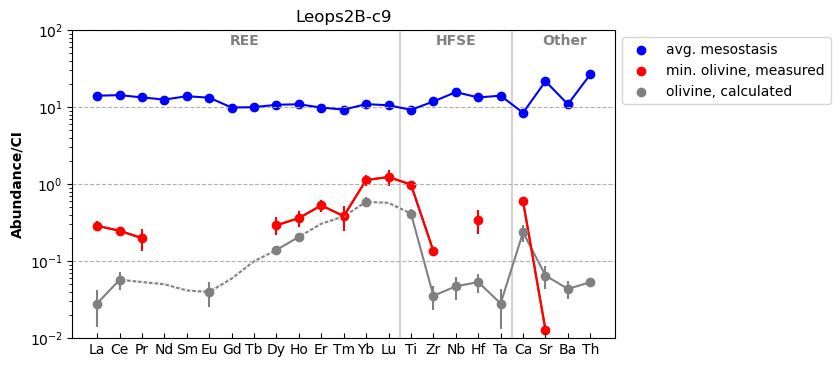

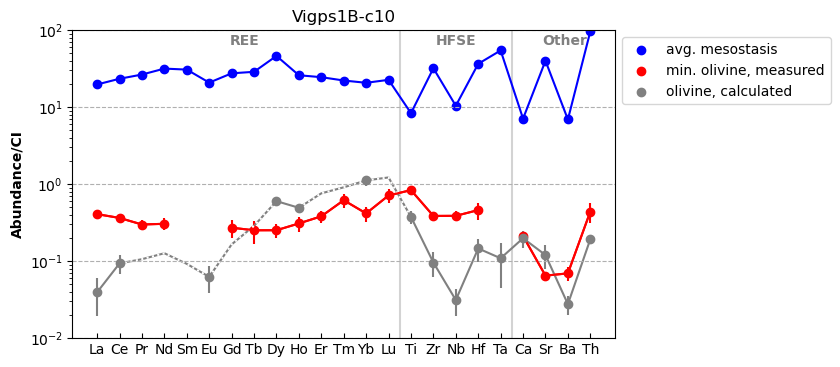

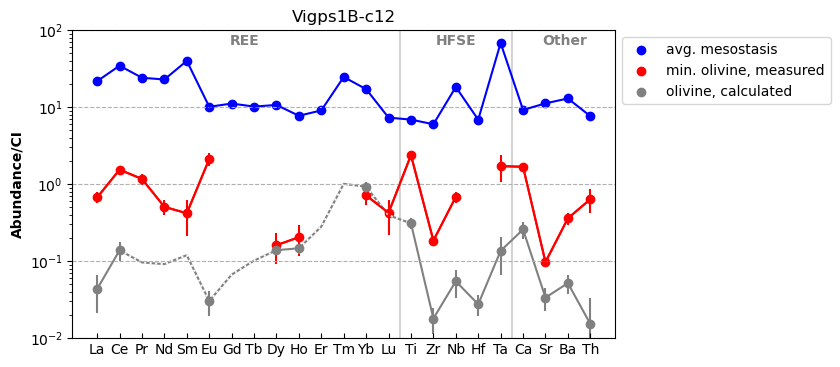

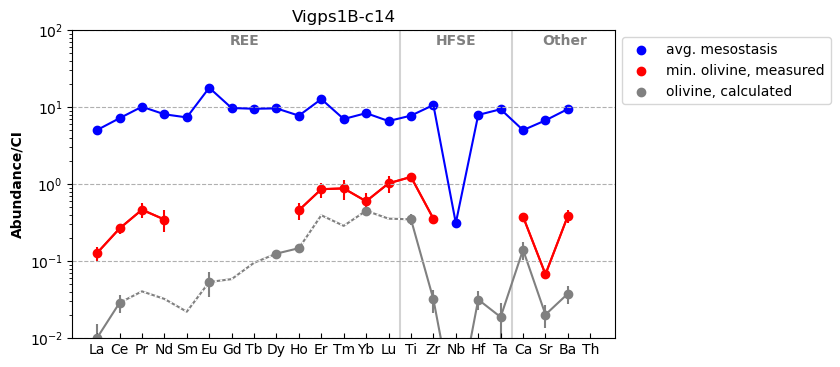

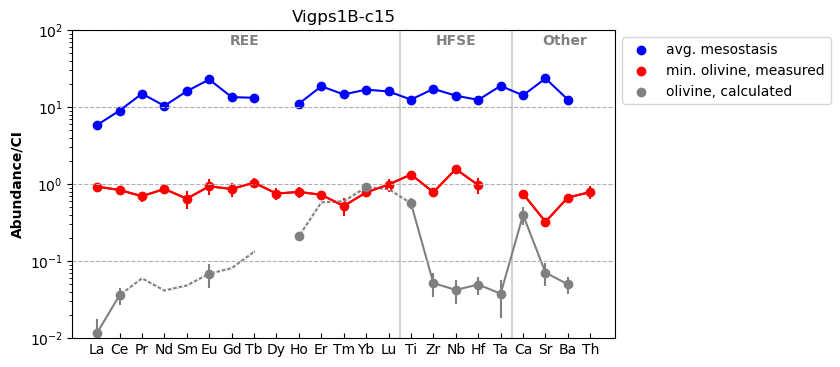

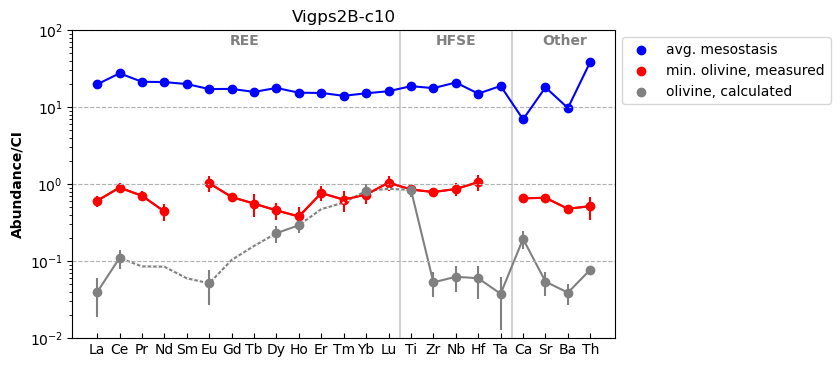

In [116]:
noninterp_ele = ['La', 'Ce', 'Eu', 'Dy', 'Ho', 'Yb', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th']
for i in range(0, len(chondrules)):
    if chondrules[i] in olv_avg_meas.index:
        #setting up plot
        fig, ax = plt.subplots(figsize=(7,4))

        ax.set_ylabel('Abundance/CI', fontweight='bold')
        ax.set_yscale("log") 
        ax.set_ylim([10**-2, 10**2])
        ax.grid(axis='y', linestyle='--', zorder=0)
        ax.set_title(chondrules[i][0]+'-'+chondrules[i][1])

        ax.tick_params(axis='x', direction='in')
        
        ax.axvline(x=13.5, color='lightgrey', zorder=0)
        ax.axvline(x=18.5, color='lightgrey', zorder=0)
       
        ax.text(5.9, 65, 'REE', color='grey', fontweight='bold')
        ax.text(15.1, 65, 'HFSE', color='grey', fontweight='bold')
        ax.text(19.85, 65, 'Other', color='grey', fontweight='bold')
        
        #plotting
        #glass
        ax.scatter(elements, gls_avg_ci.loc[chondrules[i]], color='blue', label='avg. mesostasis')
        ax.plot(elements, gls_avg_ci.loc[chondrules[i]], color='blue')

        #olivine measured
        spot = int(olv_spots.loc[chondrules[i]])
        olv_meas = olv[(olv.Met_Name==chondrules[i][0]) & (olv.Object==chondrules[i][1]) & (olv.Spot_Num==spot)][col_grab].values.flatten()
        olv_measerr = olverr[(olverr.Met_Name==chondrules[i][0]) & (olverr.Object==chondrules[i][1]) & (olv.Spot_Num==spot)][col_graberr].values.flatten()
        olv_meas_ci = olv_meas/ci
        olv_meas1err_ci = (olv_measerr/2)/ci
        
        ax.scatter(elements, olv_meas_ci, color='red', label='min. olivine, measured')
        ax.plot(elements, olv_meas_ci, color='red')
        ax.errorbar(elements, olv_meas_ci, olv_meas1err_ci, color='red', zorder=0)

        #olivine calculated
        ax.errorbar(elements, olv_avg_calc_ci.loc[chondrules[i]], zerr.loc[chondrules[i]], color='grey', zorder=0)
            #non interp data
        noniterp_olv_calc = pd.concat([olv_avg_calc_ci.loc[chondrules[i]].iloc[[0, 1, 5, 8, 9, 12]], olv_avg_calc_ci.loc[chondrules[i]].iloc[14:]])
        ax.scatter(noninterp_ele, noniterp_olv_calc, color='grey', label='olivine, calculated', zorder=2)
            #interp data
        ax.plot(['Ce', 'Pr', 'Nd', 'Sm', 'Eu'], olv_avg_calc_ci.loc[chondrules[i]][1:6], linestyle='dotted', color='white', zorder=1)
        ax.plot(['Eu', 'Gd', 'Tb', 'Dy'], olv_avg_calc_ci.loc[chondrules[i]][5:9], linestyle='dotted', color='white', zorder=1)
        ax.plot(['Ho', 'Er', 'Tm', 'Yb'], olv_avg_calc_ci.loc[chondrules[i]][9:13], linestyle='dotted', color='white', zorder=1)
        ax.plot(['Yb', 'Lu', 'Ti'], olv_avg_calc_ci.loc[chondrules[i]][12:15], linestyle='dotted', color='white', zorder=1)
        

        ax.legend(bbox_to_anchor=(1, 1))